### Analysis of w+; UAS-ArcLight/ +; R38G02-Gal4/ lexAop-TNT (Control Flies)

In [2]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

import octopus as oct

In [27]:
filenames =['R38G02-ArcLight_TNT-Ctrl_SING001_2020-05-29_11.17-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight_TNT-Ctrl_SING008_2020-05-29_18.58-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight_TNT-Ctrl_SING006_2020-05-30_14.45-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight_TNT-Ctrl_SING002_2020-05-31_20.48-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight_TNT-Ctrl002_2020-06-02_14.32-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight-TNT-Ctrl005_2020-06-05_15.25-TNT-Ctrl_Ftrace_mean',
            'R38G02-ArcLight-TNT-Ctrl003_2020-06-07_17.40-TNT-Ctrl_Ftrace_mean']

In [28]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

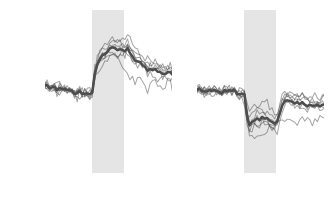

In [31]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = '0.3', alpha = 0.5, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = '0.3', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.14,0.14])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = '0.3', alpha = 0.5, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = '0.3', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.14,0.14])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig2_R38G02_TNT_Ctrl_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [33]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

In [34]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [35]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.1679509127633958   D_deg = 221.21961303967788
H_magn =0.12581119458091466   H_deg = 228.42129670638568
MOI = 0.7431854359439941
D_magn =0.10475705171567355   D_deg = 259.76864387408705
H_magn =0.11352155846442998   H_deg = 255.36158822254876
MOI = 0.9200659121964134
D_magn =0.14260543878966014   D_deg = 273.1646614399937
H_magn =0.06461303657213113   H_deg = 275.8341936967848
MOI = 0.4525978669915969
D_magn =0.11474321631825352   D_deg = 260.56469196196326
H_magn =0.08582159219811916   H_deg = 269.16903688997985
MOI = 0.7395267119062255
D_magn =0.1802540334099572   D_deg = 247.64384034348595
H_magn =0.0711684293604298   H_deg = 254.94392221902393
MOI = 0.39162261899261225
D_magn =0.17256288210209722   D_deg = 228.67588571771248
H_magn =0.10048761765176209   H_deg = 232.95948857026713
MOI = 0.5806979423237993
D_magn =0.17127020381082528   D_deg = 234.3079487256125
H_magn =0.12277954907728074   H_deg = 248.98762283466547
MOI = 0.6934758131608302


In [36]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.2931941092037885   R_deg = 224.3032526243332
R_indiv_magn = 0.39769433217106165
LDir = 0.7372348195238445
R_magn =0.21811746458024087   R_deg = 257.4765945642735
R_indiv_magn = 0.27986838354491517
LDir = 0.7793572886564941
R_magn =0.207170214523388   R_deg = 273.9969734133165
R_indiv_magn = 0.2774158114159057
LDir = 0.7467858932265237
R_magn =0.20001144260709344   R_deg = 264.2453431571527
R_indiv_magn = 0.27317781895811727
LDir = 0.732165749656851
R_magn =0.25100854072952083   R_deg = 249.70848328451544
R_indiv_magn = 0.3625268652426782
LDir = 0.6923860403048857
R_magn =0.27287304037891447   R_deg = 230.25208542388367
R_indiv_magn = 0.3700028653486125
LDir = 0.7374889924752788
R_magn =0.2917060539996603   R_deg = 240.43091860483358
R_indiv_magn = 0.4138885184882163
LDir = 0.704793781342754


In [38]:
# Save Ftrace as numpy array

np.save('R38G02_TNT_Ctrl_Ftrace_all.npy', Ftrace_all)
np.save('R38G02_TNT_Ctrl_Ftrace_mean.npy', Ftrace_mean)
np.save('R38G02_TNT_Ctrl_MOI.npy', MOI_flies)
np.save('R38G02_TNT_Ctrl_LDir.npy', LDir_flies)